## Oscilador armónico cuántico unidimensional 

In [1]:
# Librerías utilizadas
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def EL(x,α):
    """
    Energía local 
    inpuuts:  Coordenadas espaciales y valores de alpha (α) 
    
    outputs: Energía 
    """
    return α + x**2*(0.5-2*α**2)

def transition_probability(x,x̄,α):
    """
    Probabilidad de transición
    
    inpuuts: Coordenadas espaciales en estado inicial x y coordenadas espaciales de la transición xp 
    
    outputs: probabilidad de transición
    """
    return np.exp(-2*α*(x̄**2-x**2))
    #return np.exp(-2*α*(x̄**2-x**2))

def vmc(num_walkers,num_MC_steps,num_equil_steps,α,δ=1.0):
    """
    Implementación del método de Monte Carlo Variacional
    
    inpuuts: número de replicas, número de pasos de MC, num_equil_steps, valores del alpha y delta=1 
    
    outputs:  valores de la energía en función de alpha
    """    
    # inicialización de las replicas 
    walkers = -0.5 + np.random.rand(num_walkers)

    #Inicialización de la energía y número de aceptación 
    estimator = {'E':np.zeros(num_MC_steps-num_equil_steps)}
    num_accepted = 0
    
    for step in range(num_MC_steps):
        # generación de replicas aleatroias
        new_walkers = np.random.normal(loc=walkers, scale=δ, size=num_walkers)
        # prueba de aceptación de la la replica generada 
        for i in range(num_walkers):
            if np.random.random() < transition_probability(walkers[i],new_walkers[i],α):
                num_accepted += 1 
                walkers[i] = new_walkers[i]
                
            # Estimación de la energía del estado base
            if step >= num_equil_steps:
                measure = step-num_equil_steps
                estimator['E'][measure] = EL(walkers[i],α)
                
    # output del ratio de aceptación 
    print('accept: %4.2f' % (num_accepted/(num_MC_steps*num_walkers)))
    
    return estimator, walkers

def fun(rangoalpha):
  """
  Función para estimar el valor de la energía para diferentes valores de alpha
  input:  vector con diferentes valores de alpha 
  output: valores de la energía para los diferentes alphas del input 
  """
  E = []
  for alpha in rangoalpha: 
    α = alpha 
    print(α)
    num_walkers = 100
    num_MC_steps = 20000
    num_equil_steps = 5000
    np.random.seed(1173)
    estimator, vector = vmc(num_walkers,num_MC_steps,num_equil_steps,α,δ=1.0)
    meanE = np.mean(estimator['E'])
    E.append(meanE)
  return E 

def funciondeonda(xx):
    """
    Estima la función de onda a partir de los valores de x 
    
    inputs: xx coordenada espacial

    outputs: yf estimación de la función de onda 
             xf valores de x, intervalos
    """
    x = xx
    xmin = -4
    xmax =  4
    Num = 60
    dx = (xmax-xmin)/Num
    Nf = []
    xf = []
    for n in range(Num):
        Nn = []
        for i in range(len(x)):
            if ((x[i]< xmin+(n+1)*dx) & (x[i]>xmin+(n)*dx)):
                Nn.append(x[i])
        Nf.append(len(Nn))
        xf.append(xmin+dx*n)
    
    yf = np.array(Nf)/np.max(Nf)*phi0(0)
    
    return xf,yf

def phi0(x):
    """
    función de onda teórica del oscilador armónico en el estado base 
    
    """
    return (np.pi)**(-0.5)*np.exp(-np.array(x)**2)

# Implementación del método de MCV  para diferentes valores de alpha 

In [3]:
rangoalpha = np.linspace(0,2,300)
E=fun(rangoalpha)
E=np.array(E)

0.0
accept: 1.00
0.006688963210702341
accept: 0.95
0.013377926421404682
accept: 0.93
0.020066889632107024
accept: 0.91
0.026755852842809364
accept: 0.90
0.033444816053511704
accept: 0.89
0.04013377926421405
accept: 0.87
0.046822742474916385
accept: 0.86
0.05351170568561873
accept: 0.86
0.06020066889632107
accept: 0.85
0.06688963210702341
accept: 0.84
0.07357859531772575
accept: 0.83
0.0802675585284281
accept: 0.82
0.08695652173913043
accept: 0.82
0.09364548494983277
accept: 0.81
0.10033444816053512
accept: 0.81
0.10702341137123746
accept: 0.80
0.11371237458193979
accept: 0.79
0.12040133779264214
accept: 0.79
0.12709030100334448
accept: 0.78
0.13377926421404682
accept: 0.78
0.14046822742474915
accept: 0.77
0.1471571906354515
accept: 0.77
0.15384615384615385
accept: 0.76
0.1605351170568562
accept: 0.76
0.16722408026755853
accept: 0.75
0.17391304347826086
accept: 0.75
0.1806020066889632
accept: 0.74
0.18729096989966554
accept: 0.74
0.1939799331103679
accept: 0.74
0.20066889632107024
accep

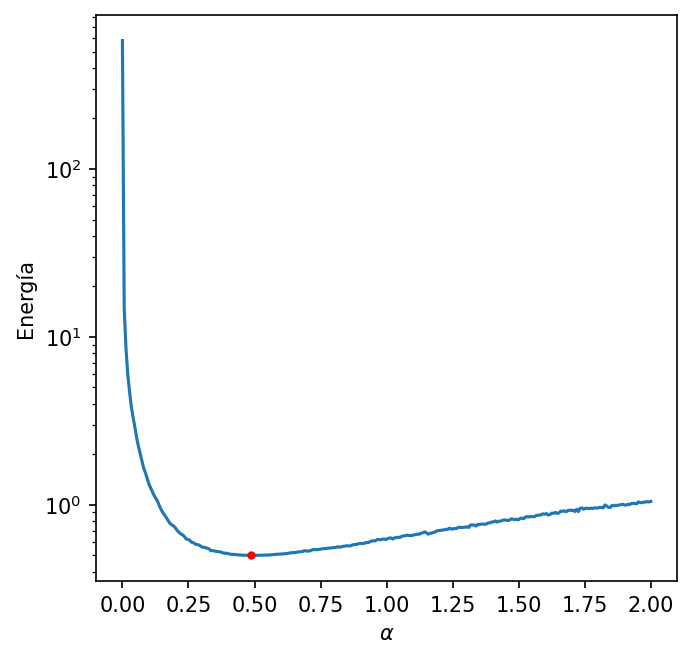

In [4]:
plt.figure(figsize=(5, 5),dpi=150)
plt.plot(rangoalpha,E)
plt.plot(rangoalpha[int(np.where(E==np.min(E))[0])],np.min(E), 'r.')
plt.ylabel('Energía')
plt.xlabel(r'$\alpha$')
plt.yscale('log')
plt.savefig('energia_alpha.jpg',format='jpg',dpi=300)

In [5]:
α = rangoalpha[int(np.where(E==np.min(E))[0])]
num_walkers = 20000
num_MC_steps = 20000
num_equil_steps = 5000
bestimator, funtion = vmc(num_walkers,num_MC_steps,num_equil_steps,α)

accept: 0.61


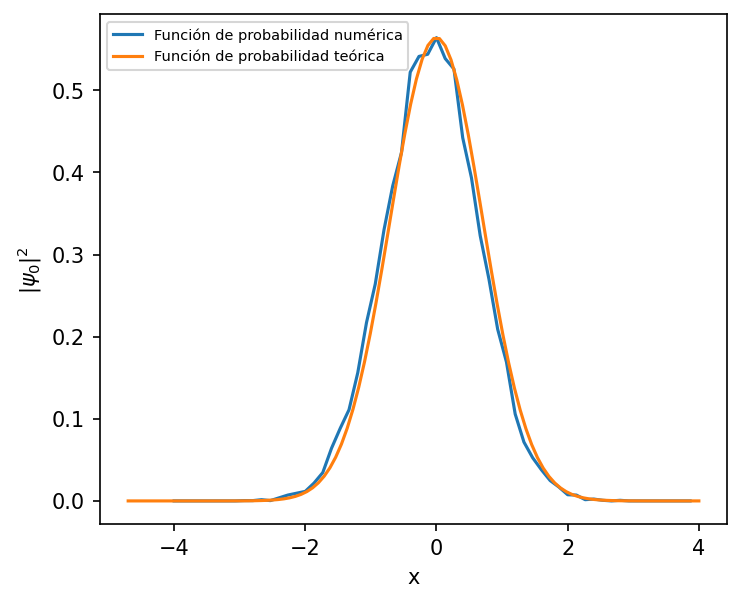

In [6]:
x=np.linspace(-4.7,4,100)
y=phi0(x)
plt.figure(figsize=(5.4, 4.5),dpi=150)
xxx, yyy =funciondeonda(funtion)
plt.plot(xxx,yyy,label='Función de probabilidad numérica')
plt.plot(x,y,label='Función de probabilidad teórica')
plt.xlabel('x')
plt.ylabel(r'$|\psi_0|^2$')
plt.legend(loc='best',fontsize = 7)
plt.savefig('funcionaes_de_onda.jpg',format='jpg',dpi=300)